# Notebook1

In [1]:
import sqlite3
import csv


# CONNECTING TO THE DATA BASE

In [2]:
# let us connect to SQLite database
conn = sqlite3.connect('sales_db.sqlite')
cursor = conn.cursor()

# CREATING THE 3NF DATABASE

In [3]:
# let us create the normalized tables
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    Area_Code TEXT,
    State TEXT,
    Market TEXT,
    Market_Size TEXT,
    Date TEXT,
    Sales REAL,
    Profit REAL,
    COGS REAL,
    ProductID TEXT
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS products (
    ProductID TEXT PRIMARY KEY,
    Product_Type TEXT,
    Product TEXT
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS marketing (
    Area_Code TEXT PRIMARY KEY,
    Marketing REAL,
    Total_Expenses REAL,
    Margin REAL,
    Budget_Sales REAL,
    Budget_Profit REAL,
    Budget_COGS REAL
)
''')

conn.commit()

In [4]:
sales_data = []
products_data = []
marketing_data = []

# READING THE DATA SALES.CSV INSERTING INTO DATABASE

In [5]:
with open('sales.csv', 'r') as file:
    csv_reader = csv.DictReader(file)
    for row in csv_reader:
        # Prepare data for sales table
        sales_data.append((
            row['Area Code'], row['State'], row['Market'], row['Market Size'], row['Date'],
            row['Sales'], row['Profit'], row['COGS'], row['ProductId']
        ))

        # Prepare data for products table
        products_data.append((
            row['ProductId'], row['Product Type'], row['Product']
        ))

        # Prepare data for marketing table
        marketing_data.append((
            row['Area Code'], row['Marketing'], row['Total Expenses'], row['Margin'],
            row['Budget Sales'], row['Budget Profit'], row['Budget COGS']
        ))

# let us use `executemany` to insert data into the database
cursor.executemany('''
INSERT OR IGNORE INTO sales (Area_Code, State, Market, Market_Size, Date, Sales, Profit, COGS, ProductID)
VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)
''', sales_data)

cursor.executemany('''
INSERT OR IGNORE INTO products (ProductID, Product_Type, Product)
VALUES (?, ?, ?)
''', products_data)

cursor.executemany('''
INSERT OR IGNORE INTO marketing (Area_Code, Marketing, Total_Expenses, Margin, Budget_Sales, Budget_Profit, Budget_COGS)
VALUES (?, ?, ?, ?, ?, ?, ?)
''', marketing_data)

# Commit the changes
conn.commit()

# VERYFYING THE DATA INSERTED

In [6]:
# let us Verify the data
for row in cursor.execute('SELECT * FROM sales LIMIT 5'):
    print(row)

for row in cursor.execute('SELECT * FROM products LIMIT 5'):
    print(row)

for row in cursor.execute('SELECT * FROM marketing LIMIT 5'):
    print(row)

# Close the connection
conn.close()

('203', 'Connecticut', 'East', 'Small Market', '04/01/10 00:00:00', 292.0, 107.0, 116.0, '2')
('203', 'Connecticut', 'East', 'Small Market', '07/01/10 00:00:00', 225.0, 75.0, 90.0, '2')
('203', 'Connecticut', 'East', 'Small Market', '11/01/10 00:00:00', 325.0, 122.0, 130.0, '2')
('203', 'Connecticut', 'East', 'Small Market', '12/01/10 00:00:00', 289.0, 105.0, 115.0, '2')
('203', 'Connecticut', 'East', 'Small Market', '07/01/11 00:00:00', 223.0, 104.0, 90.0, '2')
('2', 'Coffee', 'Columbian')
('13', 'Tea', 'Green Tea')
('5', 'Espresso', 'Caffe Mocha')
('6', 'Espresso', 'Decaf Espresso')
('9', 'Herbal Tea', 'Lemon')
('203', 38.0, 69.0, 176.0, 270.0, 110.0, 110.0)
('206', 16.0, 39.0, 77.0, 160.0, 70.0, 60.0)
('209', 40.0, 63.0, -21.0, 130.0, -80.0, 160.0)
('210', 75.0, 96.0, 288.0, 660.0, 270.0, 300.0)
('212', 22.0, 34.0, 117.0, 210.0, 100.0, 80.0)


In [7]:
import pandas as pd

# FETCHING THE DATA FROM DATABASE INTO PANDAS DATA FRAME

In [8]:
# Connect to the SQLite database
conn = sqlite3.connect('sales_db.sqlite')


query = """
SELECT
    s.Area_Code,
    s.State,
    s.Market,
    s.Market_Size,
    s.Date,
    s.Sales,
    s.Profit,
    s.COGS,
    p.Product_Type,
    p.Product,
    m.Marketing,
    m.Total_Expenses,
    m.Margin
FROM sales s
JOIN products p ON s.ProductID = p.ProductID
JOIN marketing m ON s.Area_Code = m.Area_Code;
"""

# let us execute the query and load the results into a Pandas DataFrame
df = pd.read_sql_query(query, conn)


print(df.head())

# Close the database connection
conn.close()

  Area_Code        State Market   Market_Size               Date  Sales  \
0       203  Connecticut   East  Small Market  04/01/10 00:00:00  292.0   
1       203  Connecticut   East  Small Market  07/01/10 00:00:00  225.0   
2       203  Connecticut   East  Small Market  11/01/10 00:00:00  325.0   
3       203  Connecticut   East  Small Market  12/01/10 00:00:00  289.0   
4       203  Connecticut   East  Small Market  07/01/11 00:00:00  223.0   

   Profit   COGS Product_Type    Product  Marketing  Total_Expenses  Margin  
0   107.0  116.0       Coffee  Columbian       38.0            69.0   176.0  
1    75.0   90.0       Coffee  Columbian       38.0            69.0   176.0  
2   122.0  130.0       Coffee  Columbian       38.0            69.0   176.0  
3   105.0  115.0       Coffee  Columbian       38.0            69.0   176.0  
4   104.0   90.0       Coffee  Columbian       38.0            69.0   176.0  


In [9]:
from sklearn.model_selection import train_test_split

# DATA EXPLORATION and  DATA CLEANING TASKS
upto dagshub authetications all comes under eda


In [16]:
# let us do Basic Data Exploration
print(df.describe())
print(df.info())

             Sales       Profit         COGS    Marketing  Total_Expenses  \
count  4248.000000  4248.000000  4248.000000  4248.000000     4248.000000   
mean    192.987524    61.097693    84.433145    31.027778       57.586158   
std     151.133127   101.708546    67.249769    24.058846       31.672656   
min      17.000000  -638.000000     0.000000     5.000000       16.000000   
25%     100.000000    17.000000    43.000000    15.000000       39.000000   
50%     138.000000    40.000000    60.000000    23.000000       46.000000   
75%     230.000000    92.000000   100.000000    39.000000       66.000000   
max     912.000000   778.000000   364.000000   127.000000      178.000000   

            Margin  
count  4248.000000  
mean    125.374765  
std     120.080857  
min     -67.000000  
25%      56.000000  
50%      84.000000  
75%     144.000000  
max     613.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 13 columns):
 #   Colum

In [11]:
# drop any missing rows
df = df.dropna()

In [13]:
categorical_columns = ['COGS']  # Replace with your actual categorical columns

for col in categorical_columns:
    print(f"Unique values in column {col}:")
    print(df[col].unique())
    print("\n")


Unique values in column COGS:
[116.  90. 130. 115. 103. 125.  20.  36.  19.  24.  53.  60.  61.  75.
  65.  63.  64.  62.  55.  48.  43.  42.  47.  49.  85.  76.  80.  67.
  79.  74.  68.  35.  34.  44.  37.  69.  92.  95. 110. 133. 124.  93.
  96. 105.  58.  59.  54.  57.  78.  83.  71. 123.  40.  56.  52.  46.
  45.  50.  30.  33.  22. 127. 154. 284. 121. 247. 251.  39. 113. 244.
 104.  81.  86. 135. 173. 260. 239. 258. 364. 249. 234. 253. 228. 214.
 225. 118. 266.  84.  77.  41.  51. 145. 162. 149.  21.  18. 144. 191.
 252. 243. 100. 196. 291.  87.  91.  94.  72.  38. 170. 181. 114.  82.
 112.  32.  97.  70.  31.  99. 153. 155.  88. 132. 263. 207. 148. 238.
 200. 224. 272. 257.  89.  29. 279. 265. 271. 235.  25.  23.  28.  10.
  15.   0. 109. 141. 245. 270. 111. 101. 209.  27. 102. 241. 120. 213.
  98. 134. 161.  16.  17. 295. 122. 240. 255. 316. 108. 250. 356. 211.
 294. 302. 195.  14. 311.]




# TEST TRAIN SPLIT

In [14]:
# Check class distribution
print(df['Product_Type'].value_counts())

# Train/test split with stratification (if needed)
X = df.drop(['Product_Type'], axis=1)
y = df['Product_Type']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Product_Type
Espresso      1176
Coffee        1056
Herbal Tea    1056
Tea            960
Name: count, dtype: int64
Train shape: (3398, 12), Test shape: (850, 12)


# CORRELATION MATRIX

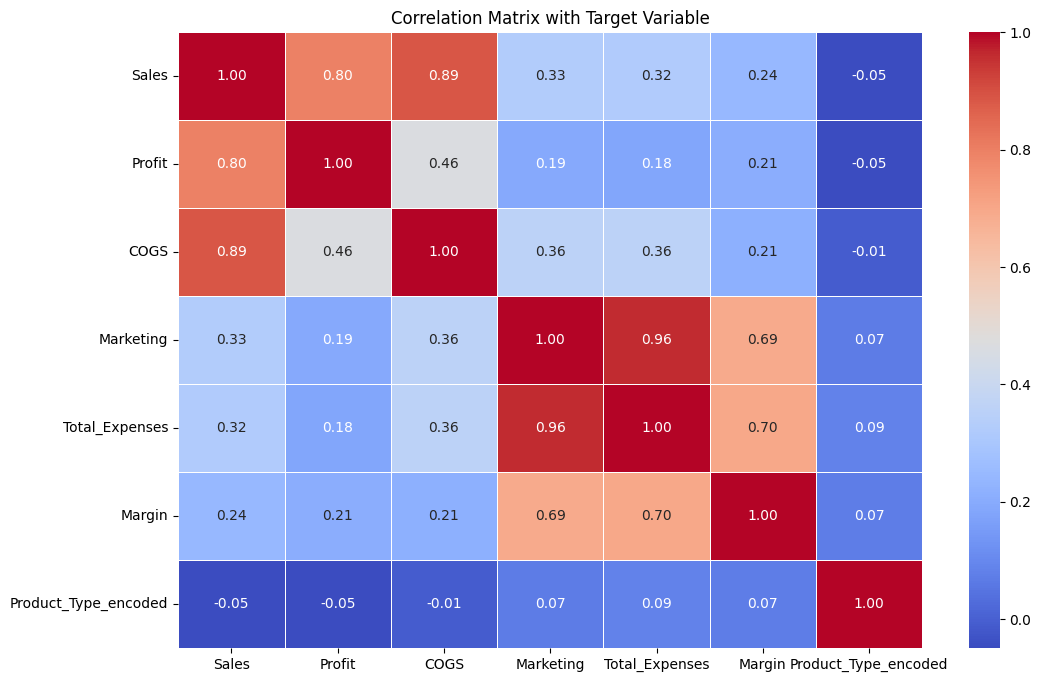

In [21]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
label_encoder = LabelEncoder()
df['Product_Type_encoded'] = label_encoder.fit_transform(df['Product_Type'])

# Selecting the numerical columns for correlation
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# let us Compute the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plot the heatmap with the target variable included
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix with Target Variable')
plt.show()

In [22]:
# let us investigate negative values
negative_profit_margin = df[(df['Profit'] < 0) | (df['Margin'] < 0)]
print(negative_profit_margin)

# let us Replace negatives with 0 or a placeholder (based on business rules)
df['Profit'] = df['Profit'].clip(lower=0)
df['Margin'] = df['Margin'].clip(lower=0)


     Area_Code          State Market   Market_Size               Date  Sales  \
14         203    Connecticut   East  Small Market  06/01/10 00:00:00  128.0   
23         203    Connecticut   East  Small Market  12/01/11 00:00:00  140.0   
68         206     Washington   West  Small Market  08/01/10 00:00:00  105.0   
130        209     California   West  Major Market  05/01/10 00:00:00  106.0   
131        209     California   West  Major Market  07/01/10 00:00:00   87.0   
...        ...            ...    ...           ...                ...    ...   
4111       971         Oregon   West  Small Market  11/01/11 00:00:00  133.0   
4205       978  Massachusetts   East  Major Market  12/01/11 00:00:00  106.0   
4243       985      Louisiana  South  Small Market  07/01/10 00:00:00  113.0   
4244       985      Louisiana  South  Small Market  08/01/10 00:00:00  105.0   
4245       985      Louisiana  South  Small Market  12/01/10 00:00:00  131.0   

      Profit   COGS Product_Type      P

In [23]:
df['Date'] = pd.to_datetime(df['Date'])
print(df['Date'].head())


0   2010-04-01
1   2010-07-01
2   2010-11-01
3   2010-12-01
4   2011-07-01
Name: Date, dtype: datetime64[ns]


<ipython-input-23-111663ed1450>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


# plotting outliers

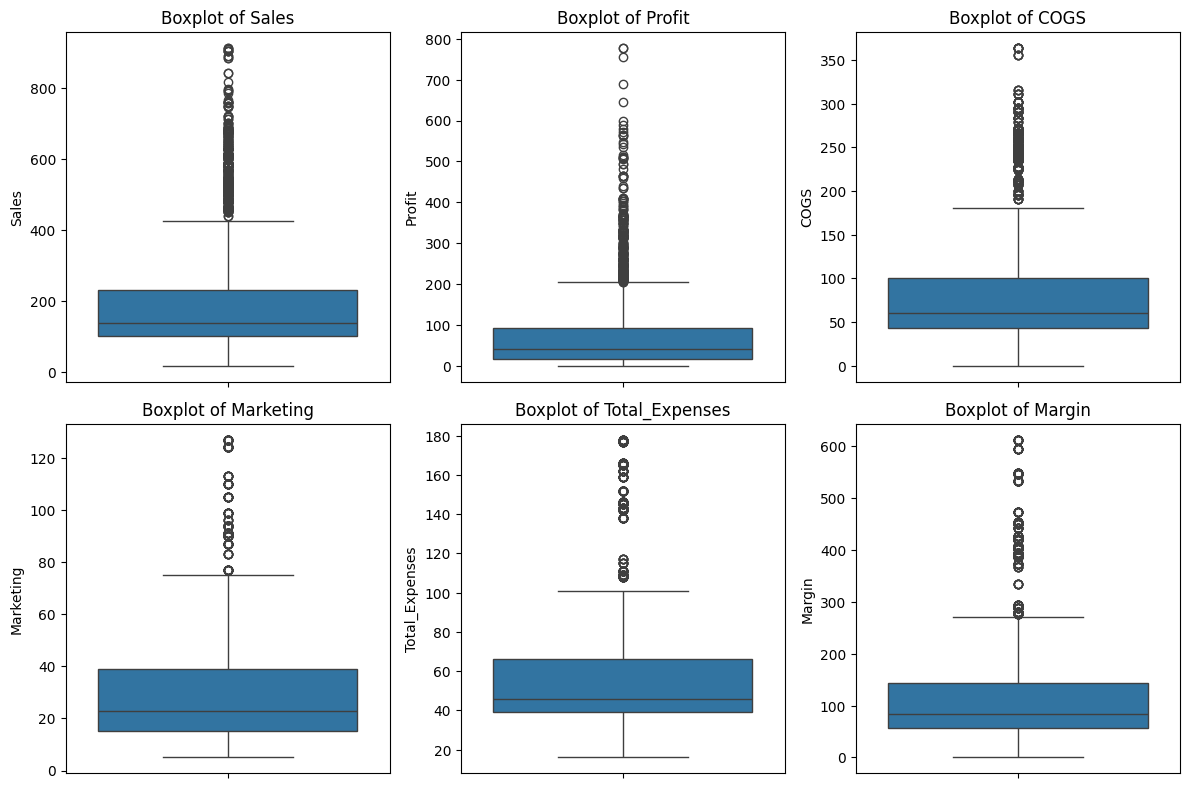

In [24]:
#let us  visualize outliers using boxplots
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = ['Sales', 'Profit', 'COGS', 'Marketing', 'Total_Expenses', 'Margin']

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


In [26]:
# Handle missing values (impute with mean for numerical and most frequent for categorical)
from sklearn.impute import SimpleImputer
# Assuming the dataframe has these numerical columns
numerical_features = ['Sales', 'Profit', 'COGS', 'Marketing', 'Total_Expenses']

# You can define other variables similarly
categorical_features = ['State', 'Market', 'Market_Size']

imputer = SimpleImputer(strategy='mean')
df[numerical_features] = imputer.fit_transform(df[numerical_features])

In [27]:
X = df.drop(['Product_Type', 'Date'], axis=1)  # Exclude non-predictive columns
y = df['Product_Type']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"New Train shape: {X_train.shape}, Test shape: {X_test.shape}")


New Train shape: (2973, 12), Test shape: (1275, 12)


# DAGSHUB AUTHENCTION FOR ML FLOW

In [ ]:
!pip install dagshub mlflow

from dagshub import init
import mlflow
import mlflow.sklearn

# Initializing the DagsHub
init(
    repo_owner='ushasreepeketi',
    repo_name='my-first-repo',
    mlflow=True
)


mlflow.set_experiment("ML_Project_Experiments")


Initialized MLflow to track repo "ushasreepeketi/my-first-repo"

Repository ushasreepeketi/my-first-repo initialized!

<Experiment: artifact_location='mlflow-artifacts:/9a2acbaef5b44313bd3d4e4973759481', creation_time=1734596403106, experiment_id='0', last_update_time=1734596403106, lifecycle_stage='active', name='ML_Project_Experiments', tags={}>

# EXPERIMENT -1 LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score, GridSearchCV
import mlflow
import mlflow.sklearn
from sklearn.metrics import accuracy_score, f1_score
f1_scores1 = {}
# let us do the preprocessing pipeline
numerical_features = ['Sales', 'Profit', 'COGS', 'Marketing', 'Total_Expenses']
categorical_features = ['State', 'Market', 'Market_Size']

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# let us define logistic regression pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced'))
])

# Hyperparameter tuning (optional)
param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__solver': ['liblinear', 'saga'],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='f1_macro')
grid_search.fit(X_train, y_train)

# Log the experiment for mlflow
with mlflow.start_run(run_name="Logistic Regression"):
    # Cross-validation
    cv_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=10, scoring='f1_macro')
    mean_cv_score = cv_scores.mean()
    std_cv_score = cv_scores.std()

    # Fit the pipeline on full training data
    pipeline.fit(X_train, y_train)
    train_score = pipeline.score(X_train, y_train)
    test_score = pipeline.score(X_test, y_test)
    f1_scores1['Logistic Regression'] = mean_cv_score

    # Log metrics
    mlflow.log_metric("mean_cv_f1_score", mean_cv_score)
    mlflow.log_metric("std_cv_f1_score", std_cv_score)
    mlflow.log_metric("train_score", train_score)
    mlflow.log_metric("test_score", test_score)

    # Log model
    mlflow.sklearn.log_model(pipeline, "logistic_regression_pipeline")

    # Print Results
    print(f"Logistic Regression: Train Score: {train_score:.2f}, Test Score: {test_score:.2f}")
    print(f"Best Params: {grid_search.best_params_}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

Logistic Regression: Train Score: 0.35, Test Score: 0.35
Best Params: {'classifier__C': 0.1, 'classifier__solver': 'liblinear'}
🏃 View run Logistic Regression at: https://dagshub.com/ushasreepeketi/my-first-repo.mlflow/#/experiments/0/runs/5fec7d1568204a819df0ac16287d90b4
🧪 View experiment at: https://dagshub.com/ushasreepeketi/my-first-repo.mlflow/#/experiments/0


In [ ]:
from sklearn.preprocessing import LabelEncoder

# let us Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# let us Check the mapping
print("Class Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))
print(X_train.head())

Class Mapping: {'Coffee': 0, 'Espresso': 1, 'Herbal Tea': 2, 'Tea': 3}
     Area_Code          State   Market   Market_Size  Sales  Profit  COGS  \
851        360     Washington     West  Small Market  188.0    86.0  72.0   
5171       405       Oklahoma    South  Small Market  221.0    72.0  88.0   
6573       603  New Hampshire     East  Small Market  116.0     0.0  45.0   
7087       708       Illinois  Central  Major Market  190.0    92.0  78.0   
456        303       Colorado  Central  Major Market  135.0    33.0  54.0   

             Product  Marketing  Total_Expenses  Margin  
851        Columbian       21.0            43.0    99.0  
5171  Decaf Espresso       15.0            27.0    60.0  
6573     Caffe Mocha       12.0            35.0    55.0  
7087           Lemon       39.0            61.0   176.0  
456   Decaf Espresso       27.0            39.0   144.0  


# EXPERIMENT -2 (logistsic,random forest,ridge)
#xgb is done in next chunk

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
import mlflow

#let us define classifiers
classifiers = {
    'LogisticRegression': LogisticRegression(),
    'RandomForest': RandomForestClassifier(),
    'RidgeClassifier': RidgeClassifier()
}
random_forest_pipeline = None
# Loop through classifiers
for name, clf in classifiers.items():
    with mlflow.start_run(run_name=name):
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),  # Assuming preprocessor is already defined
            ('classifier', clf)
        ])

        try:
            # Cross-validation with encoded labels
            cv_scores = cross_val_score(pipeline, X_train, y_train_encoded, cv=10, scoring='f1_macro')
            mean_cv_score = cv_scores.mean()
            std_cv_score = cv_scores.std()

            # Fit the pipeline on full training data
            pipeline.fit(X_train, y_train_encoded)
            train_score = pipeline.score(X_train, y_train_encoded)
            test_score = pipeline.score(X_test, y_test_encoded)

            # Log metrics
            f1_scores1[name] = mean_cv_score
            mlflow.log_metric("mean_cv_f1_score", mean_cv_score)
            mlflow.log_metric("std_cv_f1_score", std_cv_score)
            mlflow.log_metric("train_score", train_score)
            mlflow.log_metric("test_score", test_score)

            # Log model
            mlflow.sklearn.log_model(pipeline, f"{name}_pipeline")
            # Store the RandomForest pipeline for saving later
            if name == 'RandomForest':
                random_forest_pipeline = pipeline

            print(f"{name}: Train Score: {train_score:.2f}, Test Score: {test_score:.2f}")
        except Exception as e:
            print(f"Error with {name}: {e}")


2024/12/20 23:09:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


LogisticRegression: Train Score: 0.38, Test Score: 0.37
🏃 View run LogisticRegression at: https://dagshub.com/ushasreepeketi/my-first-repo.mlflow/#/experiments/0/runs/800535d81b70481e85d2f17adf7ed890
🧪 View experiment at: https://dagshub.com/ushasreepeketi/my-first-repo.mlflow/#/experiments/0


2024/12/20 23:10:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


RandomForest: Train Score: 1.00, Test Score: 0.96
🏃 View run RandomForest at: https://dagshub.com/ushasreepeketi/my-first-repo.mlflow/#/experiments/0/runs/bc0d82c81337493b9ce7d74ad1a662e7
🧪 View experiment at: https://dagshub.com/ushasreepeketi/my-first-repo.mlflow/#/experiments/0


2024/12/20 23:10:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


RidgeClassifier: Train Score: 0.36, Test Score: 0.35
🏃 View run RidgeClassifier at: https://dagshub.com/ushasreepeketi/my-first-repo.mlflow/#/experiments/0/runs/fea8fdcc299e411b84a4ade3beb69f2b
🧪 View experiment at: https://dagshub.com/ushasreepeketi/my-first-repo.mlflow/#/experiments/0


In [ ]:
from sklearn.preprocessing import LabelEncoder

# let us apply label encoding to categorical columns
label_encoder = LabelEncoder()
X_train['State'] = label_encoder.fit_transform(X_train['State'])
X_train['Market'] = label_encoder.fit_transform(X_train['Market'])
X_train['Market_Size'] = label_encoder.fit_transform(X_train['Market_Size'])
X_train['Product'] = label_encoder.fit_transform(X_train['Product'])
X_train = pd.get_dummies(X_train, drop_first=True)


print(X_train.dtypes)

# let us convert any non-numeric columns to numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')

State              int64
Market             int64
Market_Size        int64
Sales            float64
Profit           float64
                  ...   
Area_Code_971       bool
Area_Code_972       bool
Area_Code_978       bool
Area_Code_979       bool
Area_Code_985       bool
Length: 165, dtype: object


# EXPERIMENT -2 XBG

In [ ]:
import xgboost as xgb
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# let us do One-hot encode categorical features for XGBoost
categorical_columns = [ 'State', 'Market', 'Market_Size', 'Product']
X_train_encoded = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)

# let us align columns in case train and test differ after encoding
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# Handle XGBClassifier separately
with mlflow.start_run(run_name="XGBClassifier"):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    f1_scores = []

    for train_idx, val_idx in skf.split(X_train_encoded, y_train_encoded):
        X_fold_train, X_fold_val = X_train_encoded.iloc[train_idx], X_train_encoded.iloc[val_idx]
        y_fold_train, y_fold_val = y_train_encoded[train_idx], y_train_encoded[val_idx]

        # Create DMatrix
        dtrain = xgb.DMatrix(X_fold_train, label=y_fold_train)
        dval = xgb.DMatrix(X_fold_val, label=y_fold_val)

        # Train XGBoost model
        params = {
            "objective": "multi:softmax",
            "num_class": len(label_encoder.classes_),
            "eval_metric": "mlogloss",
            "seed": 12,
        }

        model = xgb.train(params, dtrain, num_boost_round=1, evals=[(dval, "validation")], verbose_eval=False)
        y_pred = model.predict(dval)
        f1 = f1_score(y_fold_val, y_pred, average='macro')
        f1_scores.append(f1)

    mean_f1 = np.mean(f1_scores)
    std_f1 = np.std(f1_scores)

    # Log metrics
    mlflow.log_metric("mean_cv_f1_score", mean_f1)
    mlflow.log_metric("std_cv_f1_score", std_f1)

    print(f"XGBClassifier: Mean F1-Score: {mean_f1:.2f}, Std F1-Score: {std_f1:.2f}")




XGBClassifier: Mean F1-Score: 1.00, Std F1-Score: 0.00
🏃 View run XGBClassifier at: https://dagshub.com/ushasreepeketi/my-first-repo.mlflow/#/experiments/0/runs/1ffe647359ca427c936a60cd1ffbe1d1
🧪 View experiment at: https://dagshub.com/ushasreepeketi/my-first-repo.mlflow/#/experiments/0


# EXPERIMENT 3

In [ ]:
with mlflow.start_run(run_name="Feature Engineering"):
    # Adding the  engineered features
    df['Profit_Margin_Ratio'] = df['Profit'] / df['Sales']
    df['Cost_Per_Marketing'] = df['COGS'] / (df['Marketing'] + 1)

    # let us Log the  parameters
    mlflow.log_param("new_features", ["Profit_Margin_Ratio", "Cost_Per_Marketing"])

    # Recompute preprocessing
    numerical_features.extend(['Profit_Margin_Ratio', 'Cost_Per_Marketing'])

    print("Feature engineering logged to MLFlow.")


Feature engineering logged to MLFlow.
🏃 View run Feature Engineering at: https://dagshub.com/ushasreepeketi/my-first-repo.mlflow/#/experiments/0/runs/bccadd6d00f840e7b4cee9b7c09e65e2
🧪 View experiment at: https://dagshub.com/ushasreepeketi/my-first-repo.mlflow/#/experiments/0


# EXPERIMENT 4

In [ ]:

from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif

with mlflow.start_run(run_name="Feature Selection"):
    # Variance Threshold
    selector = VarianceThreshold(threshold=0.01)
    X_selected = selector.fit_transform(X_train)

    # ANOVA F-test
    anova_selector = SelectKBest(score_func=f_classif, k=10)
    X_selected_anova = anova_selector.fit_transform(X_train, y_train)

    # Log feature selection
    mlflow.log_param("variance_threshold", 0.01)
    mlflow.log_param("anova_top_k", 10)

    print("Feature selection logged to MLFlow.")


Feature selection logged to MLFlow.
🏃 View run Feature Selection at: https://dagshub.com/ushasreepeketi/my-first-repo.mlflow/#/experiments/0/runs/70e399dd5e5346838e825fd43d3c9cbb
🧪 View experiment at: https://dagshub.com/ushasreepeketi/my-first-repo.mlflow/#/experiments/0


# EXPERIMENT 5

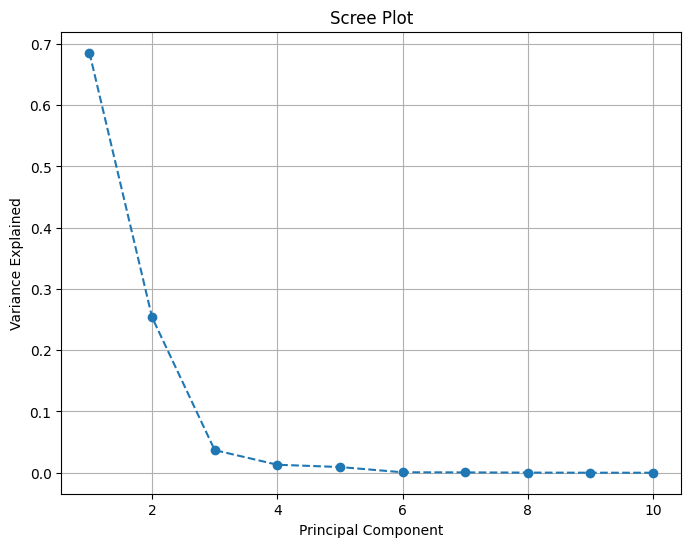

Selected 10 components for classification (up to PC 10).
PCA experiment logged to MLFlow.
🏃 View run PCA Experiment at: https://dagshub.com/ushasreepeketi/my-first-repo.mlflow/#/experiments/0/runs/df12da1a89494af0964d48063cb138f0
🧪 View experiment at: https://dagshub.com/ushasreepeketi/my-first-repo.mlflow/#/experiments/0


In [ ]:
from sklearn.decomposition import PCA
import mlflow
import matplotlib.pyplot as plt
import numpy as np

with mlflow.start_run(run_name="PCA Experiment"):
    #let us apply PCA with up to 10 components
    n_components = 10
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_train)


    explained_variance = pca.explained_variance_ratio_.tolist()

    # Plotting the  Scree Plot
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
    plt.title('Scree Plot')
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Explained')
    plt.grid(True)
    plt.show()

    # Log PCA results to MLFlow
    mlflow.log_param("pca_components", n_components)
    mlflow.log_metric("explained_variance_sum", sum(explained_variance))

    for i, variance in enumerate(explained_variance, start=1):
        mlflow.log_metric(f"pca_variance_pc{i}", variance)

    #let us  Determine the cumulative variance
    cumulative_variance = np.cumsum(explained_variance)
    mlflow.log_metric("explained_variance_cumulative", cumulative_variance[-1])

    # let us Log the number of selected components (up to 10)
    mlflow.log_param("selected_components", n_components)

    print(f"Selected {n_components} components for classification (up to PC 10).")
    print("PCA experiment logged to MLFlow.")


# EXPERIMENT 6 (custom1)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score

# let us Start a new MLFlow run for MLPClassifier
with mlflow.start_run(run_name="MLP_Product_Type"):
    model = MLPClassifier(hidden_layer_sizes=(200,), max_iter=30, random_state=42,learning_rate='adaptive')

    # Cross-validation setup
    skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
    accuracies = []
    f1_scores = []

    for train_idx, val_idx in skf.split(X_train, y_train):
        X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        # Train the model
        model.fit(X_fold_train, y_fold_train)
        y_pred = model.predict(X_fold_val)

        # Evaluate model
        accuracy = accuracy_score(y_fold_val, y_pred)
        f1 = f1_score(y_fold_val, y_pred, average='macro')

        accuracies.append(accuracy)
        f1_scores.append(f1)

    # Log the metrics
    mean_accuracy = np.mean(accuracies)
    mean_f1 = np.mean(f1_scores)

    mlflow.log_metric("mean_accuracy", mean_accuracy)
    mlflow.log_metric("mean_f1_score", mean_f1)

    print(f"MLP -> Accuracy: {mean_accuracy:.2f}, F1-Score: {mean_f1:.2f}")

print("MLP Experiment Completed.")
f1_scores1["Mlp"]=0.71


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP -> Accuracy: 0.71, F1-Score: 0.71
🏃 View run MLP_Product_Type at: https://dagshub.com/ushasreepeketi/my-first-repo.mlflow/#/experiments/0/runs/a3d803c31d8c49c68795eeb08db7d7aa
🧪 View experiment at: https://dagshub.com/ushasreepeketi/my-first-repo.mlflow/#/experiments/0
MLP Experiment Completed.


# EXPERIMENT 7 (custom experiment-2)

In [ ]:
import mlflow
import mlflow.sklearn
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd



# One-hot encode categorical columns consistently
categorical_columns = ['State', 'Market', 'Market_Size', 'Product']
X_train_encoded = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)

# Align columns so that both train and test sets have the same features
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# Scaling  the data (important for boosting models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# let us Start a new MLflow run to log this experiment
with mlflow.start_run():
    # Create the HistGradientBoosting model
    model = HistGradientBoostingClassifier(random_state=42)

    # Set up the parameter grid for hyperparameter tuning
    param_grid = {
        'max_iter': [10, 20],  # Number of boosting iterations
        'learning_rate': [0.05, 0.1, 0.01],  # Learning rate
        'max_depth': [3, 5, 7],  # Maximum depth of the trees
        'min_samples_leaf': [20, 30, 50],  # Minimum samples in each leaf node
        'l2_regularization': [0.1, 0.2],  # L2 regularization
        'max_bins': [255, 512],  # Number of bins for discretizing the data
    }

    # Set up GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    # Log the best hyperparameters found by GridSearchCV
    best_params = grid_search.best_params_
    mlflow.log_params(best_params)  # Log hyperparameters in MLflow

    # we will Get the best model after hyperparameter tuning
    best_model = grid_search.best_estimator_

    # Make predictions using the best model
    y_pred = best_model.predict(X_test_scaled)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')

    # Log the evaluation metrics in MLflow
    mlflow.log_metric('accuracy', accuracy)
    mlflow.log_metric('f1_score', f1)

    # Log the trained model in MLflow
    mlflow.sklearn.log_model(best_model, "model")

    # Print the results
    print(f"HistGradientBoosting (Tuned) -> Accuracy: {accuracy:.2f}, F1-Score: {f1:.2f}")
f1_scores1['hist gradient']=0.19

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
324 fits failed out of a total of 648.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
324 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

HistGradientBoosting (Tuned) -> Accuracy: 0.29, F1-Score: 0.19
🏃 View run masked-dog-48 at: https://dagshub.com/ushasreepeketi/my-first-repo.mlflow/#/experiments/0/runs/7a09b33203ed4cbeba57617e9dfbfbf2
🧪 View experiment at: https://dagshub.com/ushasreepeketi/my-first-repo.mlflow/#/experiments/0


# F1 SCORE PLOTTING AND CHOOSING THE BEST MODEL

<ipython-input-68-4ebd75da5026>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=f1_df, x='Model', y='F1-Score', palette="viridis")


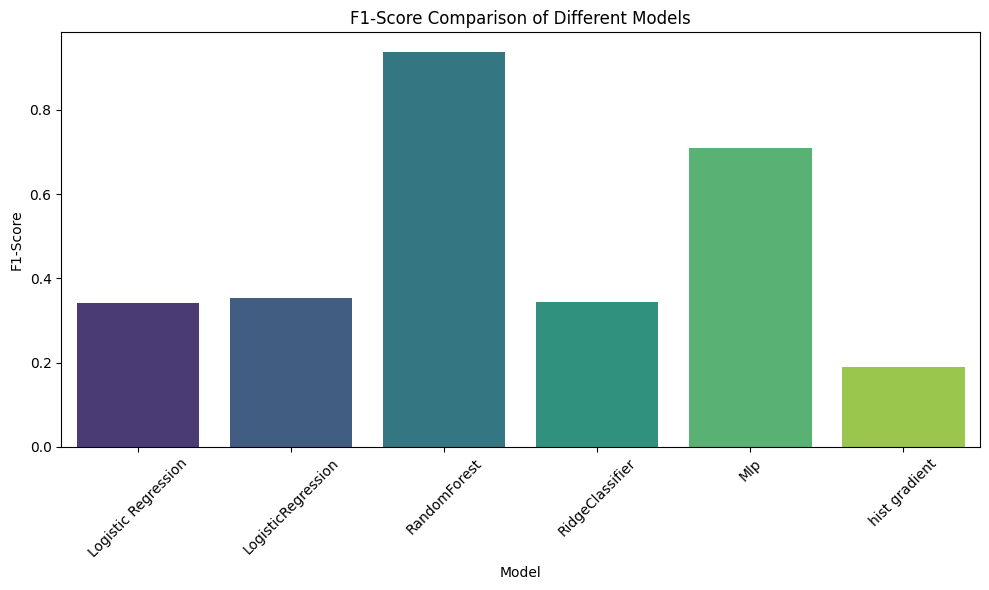

In [ ]:
f1_df = pd.DataFrame(list(f1_scores1.items()), columns=["Model", "F1-Score"])
# Creating a seaborn barplot to compare F1-scores across models and selecting the best model
plt.figure(figsize=(10, 6))
sns.barplot(data=f1_df, x='Model', y='F1-Score', palette="viridis")
plt.title("F1-Score Comparison of Different Models")
plt.xlabel("Model")
plt.ylabel("F1-Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# SAVING THE MODEL USING JOBLIB

In [ ]:
import joblib


# let us save the best model which is random forest
model = random_forest_pipeline

# Save the model to a file
joblib.dump(model, 'final_model.pkl')

print("Model saved successfully!")


Model saved successfully!


# FAST API CODE (creation):

In [ ]:
# FAST API CODE (creation):

from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import pandas as pd

#Loading  the best model we have got which is random forest
model = joblib.load('final_model.pkl')

#let us Initialize the FastAPI app
app = FastAPI()

#let us mapping of encoded labels to product types
product_type_mapping = {
    0: "Coffee",
    1: "Espresso",
    2: "Herbal Tea",
    3: "Tea"
}

class PredictionRequest(BaseModel):
    data: dict  # It accept data as a dictionary where keys are feature names and values are their respective values.

#let us define the root route
@app.get("/")
def read_root():
    return {"message": "Welcome to the FastAPI application!"}

@app.post("/predict/")
async def predict(request: PredictionRequest):
    # let us convert input data into a DataFrame
    input_data = pd.DataFrame([request.data])

    # letus predict using the model
    prediction = model.predict(input_data)

    # Mapping the numeric prediction to the product type
    predicted_product = product_type_mapping.get(prediction[0], "Unknown")

    return {"prediction": predicted_product}

#let us serve the model
if __name__ == "__main__":
    import uvicorn
    uvicorn.run(app, host="0.0.0.0", port=8000)


# docker file


In [ ]:
#let us  Use the latest Python image from Docker Hub with ARM64 architecture support

FROM --platform=linux/arm64 python:3.11-slim

#Set the working directory inside the container
WORKDIR /app

RUN apt-get update && apt-get install -y \
    build-essential \
    cmake \
    python3-dev \
    && rm -rf /var/lib/apt/lists/*

COPY requirements.txt .

RUN pip install --no-cache-dir -U pip

#Install Python dependencies listed in requirements.txt
RUN pip install --no-cache-dir -r requirements.txt

#Copy the FastAPI application to the container
COPY . .

#Expose port 8000 for the FastAPI app to run
EXPOSE 8000

#Command to run the FastAPI application using Uvicorn
CMD ["uvicorn", "main:app", "--host", "0.0.0.0", "--port", "8000"]

# PUSHED TO DOCKERHUB

# deployed the docker image to aws ecs

# STREAM LIT (CODE):

In [ ]:
# STREAM LIT (CODE):
import streamlit as st
import requests

st.title("Best Product Type to sell")
st.write("By Usha Sree Peketi")
st.write("Enter the details to check which product to sell!")

#Input Fields for the API
area_code = st.number_input("Area Code", min_value=200, max_value=999, step=1)

#Providing the dropdown options for categorical columns
state = st.selectbox("State", ['Connecticut', 'Washington', 'California', 'Texas', 'New York', 'Ohio',
                               'Illinois', 'Louisiana', 'Florida', 'Wisconsin', 'Colorado', 'Missouri',
                               'Iowa', 'Massachusetts', 'Oklahoma', 'Utah', 'Oregon', 'New Mexico',
                               'New Hampshire', 'Nevada'])

market = st.selectbox("Market", ['East', 'West', 'South', 'Central'])

market_size = st.selectbox("Market Size", ['Small Market', 'Major Market'])

product = st.selectbox("Product", ['Columbian', 'Green Tea', 'Caffe Mocha', 'Decaf Espresso', 'Lemon', 'Mint',
                                  'Darjeeling', 'Decaf Irish Cream', 'Chamomile', 'Earl Grey', 'Caffe Latte',
                                  'Amaretto', 'Regular Espresso'])

#Input Fields for numerical data
sales = st.number_input("Sales", min_value=0.0, step=0.01)
profit = st.number_input("Profit", min_value=0.0, step=0.01)
cogs = st.number_input("COGS", min_value=0.0, step=0.01)
marketing = st.number_input("Marketing", min_value=0.0, step=0.01)
total_expenses = st.number_input("Total Expenses", min_value=0.0, step=0.01)
margin = st.number_input("Margin", min_value=0.0, step=0.01)

#Button to Trigger Prediction
if st.button("Classify"):
    # Validate input to ensure all fields are filled
    if state and market and market_size and product and area_code and sales is not None and profit is not None and cogs is not None and marketing is not None and total_expenses is not None and margin is not None:
        try:
            api_url = "http://18.217.75.50:8000/predict/"

            # Construct the payload
            payload = {
                "data": {
                    "Area_Code": area_code,
                    "State": state,
                    "Market": market,
                    "Market_Size": market_size,
                    "Sales": sales,
                    "Profit": profit,
                    "COGS": cogs,
                    "Product": product,
                    "Marketing": marketing,
                    "Total_Expenses": total_expenses,
                    "Margin": margin
                }
            }

            # Make POST Request
            response = requests.post(api_url, json=payload)

            # Parse Response
            if response.status_code == 200:
                result = response.json()
                st.success(f"Prediction: {result['prediction']}")
            else:
                st.error(f"Error: {response.json().get('detail', 'Unable to get prediction from the API.')}")
        except Exception as e:
            st.error(f"An error occurred: {str(e)}")
    else:
        st.warning("Please fill out all required fields.")
else:
    st.info("Fill in the fields above and click 'Classify' to get a prediction.")

#Footer
st.write("Powered by Streamlit & FastAPI")
